<h4> What is Computer Vision ? </h4>
<p> Computer vision is a field of artificial intelligence that trains computers to interpret and understand the visual world. Using digital images from cameras and videos and deep learning models, machines can accurately identify and classify objects — and then react to what they “see.” </p>
<br>
<h4> What is Convolution Neural Networks and Why is it used ? </h4>
* In machine learning, <font color = "red">Convolutional Neural Networks (CNN or ConvNet) </font> are complex feed forward neural networks. CNNs are used for image classification and recognition because of its high accuracy. It was proposed by computer scientist Yann LeCun in the late 90s, when he was inspired from the human visual perception of recognizing things. The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer where all the neurons are connected to each other and the output is processed.
* The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image. This allows the model to learn position and scale in variant structures in the data, which is important when working with images.

* Use CNNs For: Image data, Classification prediction problems, and Regression prediction problems.
* More generally, CNNs work well with data that has a <font color = "green">spatial relationship</font>.

* The CNN input is traditionally two-dimensional, a field or matrix, but can also be changed to be one-dimensional, allowing it to develop an internal representation of a one-dimensional sequence.

* This allows the CNN to be used more generally on other types of data that has a spatial relationship. For example, there is an order relationship between words in a document of text. There is an ordered relationship in the time steps of a time series.

* Although not specifically developed for non-image data, CNNs achieve state-of-the-art results on problems such as document classification used in sentiment analysis and related problems.

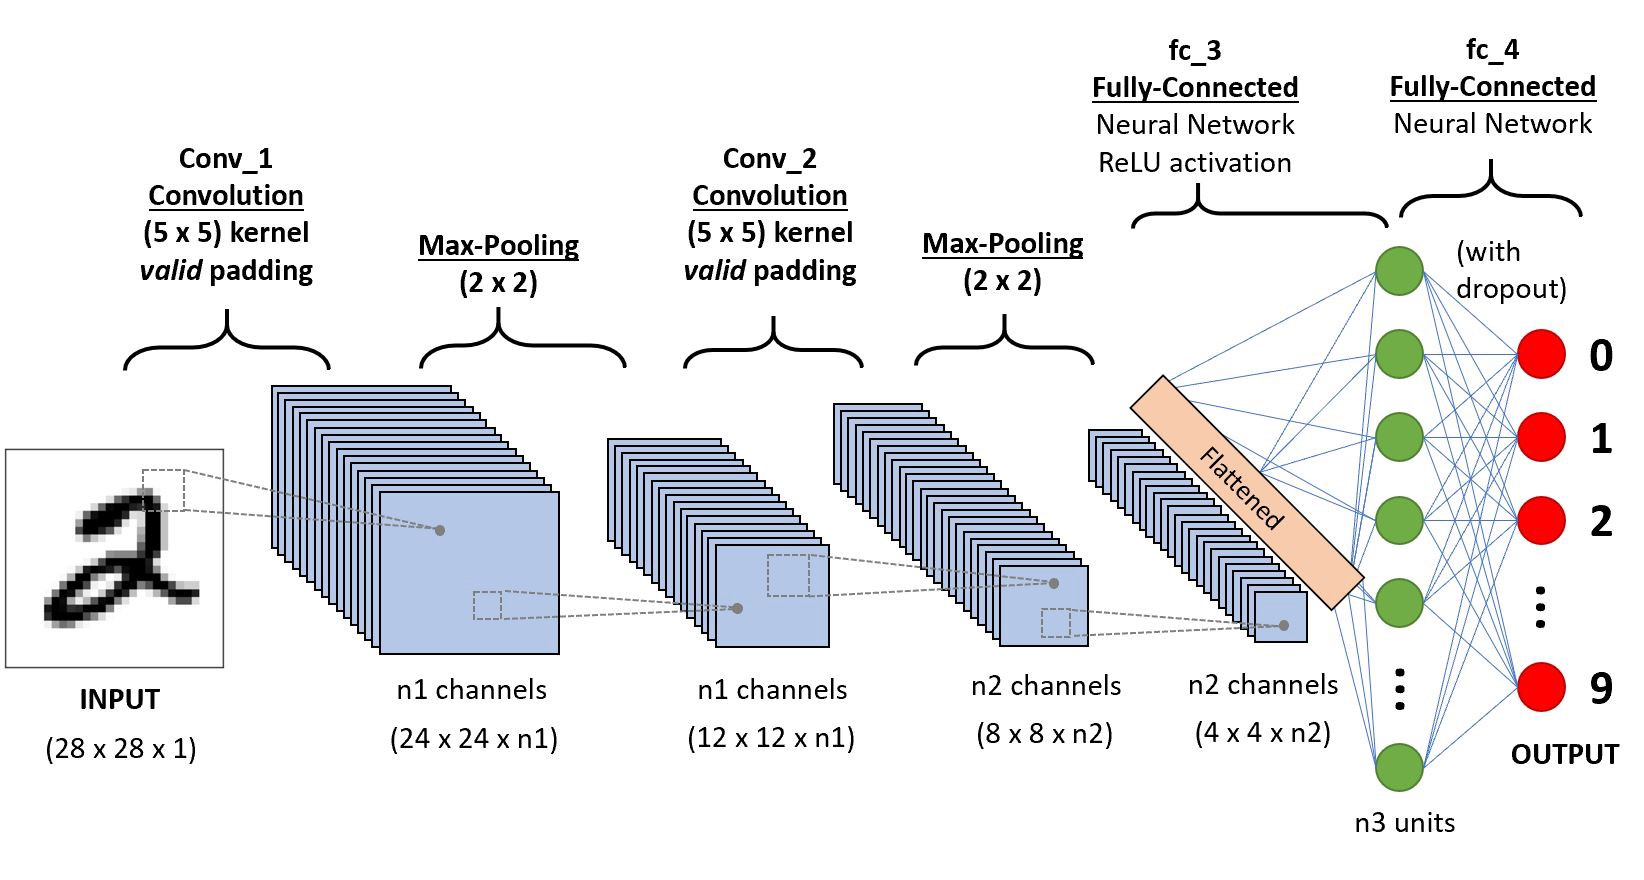

In [1]:
from IPython.display import Image
Image("../input/presentationimages/CNN_Arch/CNN_block.jpeg",width = 1000, height = 600)

# 1) Custom CNN Models

* <font color = "red"> **Convolution Layer** </font>(Conv2D used here) : In a convolutional layer, a neuron is only connected to a local area of input neurons instead of full-connection so that the number of parameters to be learned is reduced significantly and a network can grow deeper with fewer parameters. This layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
* <font color = "red"> **DropOut Layer** </font>: Dropout is a technique used to prevent a model from overfitting. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting and thus making the model generalize better.
* <font color = "red"> **Optimizers** </font>: They are algorithms or methods used to change the attributes of your neural network such as 'weights' and 'learning rate' in order to reduce the losses. These algorithms are responsible for reducing the loss,cost function to provide the most accurate results possible. 
* <font color = "red"> Types of Optimizers </font>: Gradient Descent, Stochastic Gradient Descent, RMSProp, Adam, AdaDelta, Adagrad, Adamax, Nadam, and Ftrl.
* <font color = "red"> Activation Functions </font> : Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron. Examples: ReLU, Leaky ReLU, Parametric ReLU, Softmax,tanh, Swish, Sigmoid, Mish and much more to be innovated !! 

# Installing all Requirements

In [2]:
import os
import cv2 #opencv image processing
import time # Runtime calculation
import shutil 
import itertools
import tensorflow # Deep Learning Frameworks
import numpy as np  # Mathematical and Array Operations
import pandas as pd# Data Frame Operations
from PIL import Image # Python Imaging Library
import seaborn as sns # Visualization library
import matplotlib.pyplot as plt  # Visualization library
# Deep Learning API functionalities
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix # Confusion matrix for model evaluation 
from tensorflow.keras.models import Sequential # Sequential model initialization
from sklearn.model_selection import train_test_split  # function to split sample data to train and test
from tensorflow.keras.optimizers import Adam, Nadam, Ftrl # Optimizer algorithms
from tensorflow.keras.metrics import categorical_crossentropy  # Loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For data pipeline building
# Neural network layers
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,AveragePooling2D
# To prevent Over-fitting
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [3]:
class_names = os.listdir('../input/skin-cancer-malignant-vs-benign/train')
class_types = len(os.listdir('../input/skin-cancer-malignant-vs-benign/train'))
print('Number of classes for Classification: ',class_types)
print(f'The class names are {class_names[0]} and {class_names[1]}')
print('--> Count of Train Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('../input/skin-cancer-malignant-vs-benign/train/'+i))))
print('--> Count of Test Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('../input/skin-cancer-malignant-vs-benign/test/'+i))))

Number of classes for Classification:  2
The class names are benign and malignant
--> Count of Train Images <--
benign:1440
malignant:1197
--> Count of Test Images <--
benign:360
malignant:300


# Fetching the Data using 'flow_from_directory' function 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../input/skin-cancer-malignant-vs-benign/train',
        target_size=(224,224),
        batch_size=16,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '../input/skin-cancer-malignant-vs-benign/test',
        target_size=(224,224),
        batch_size=8,
        class_mode='binary')
#model.fit(train_generator,epochs=10,validation_data=validation_generator)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


# Custom CNNs

It is always better to start form scratch or create baseline CNN models to get a gist of project and set targets and limitations on top of it.

In [5]:
# Build a 11 layer Convolutional Neural Network from scratch
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
    model.add(Conv2D(32,(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Build a 23 layer CNN from scratch
def define_model1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(6,activation='softmax'))
    # compile model
    opt = tensorflow.keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### To Note:
* The problem with the above custom developed CNNs are that their performance decreases with increase in complex data and number of epochs, and tend to overfit at higher epochs and also underfit in some severe highly complex usecases where feature extraction plays a major role in classifiation.
* These Custom Models fail to perform well on lower data. In real world, most important problem that every data scientist face is 'Data Insufficiency' and 'Class Imbalance' after that. 
* The above mentioned problem is solved by a special technique called '**Transfer Learning**'.

<h3> How to achieve Best performance using limited data and limited hardwares in Image Classification </h3>
<p>The Answer is "<font color="orange">Transfer Learning</font>" !! <br>
Transfer Learning is a research problem in Machine Learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. Keeping it simple, we say transfer learning as usage of <b>" Model trained on one task is represented on a second related task." </b> </p>
<br>
<p>There are two types of Transfer learning techniques:
1. <font color="blue">Develop Model Approaches </font>
    2. <font color="green"> Pre-trained Model Approaches </font> </p>
<br>

<h3> 1) Develop Model Approaches : </h3>
Select Data Source -----> Develop Source Model -----> Reuse model -----> Tune model
<br>
<p>
<h3> 2) Pre-trained Model Approaches : </h3>
Select Source Model -----> Reuse Model -----> Tune model -----> One Generally Freeze the layers of pre-trained Neural Networks models, except output layer.
</p>

# World of Knowledge Sharing -- If Humans can, then Neural Networks too. 
<br>
Here are some of the Architectural designs of best Transfer Learning techniques that are widely and most popularly used for any problem statement in computer vision field. 

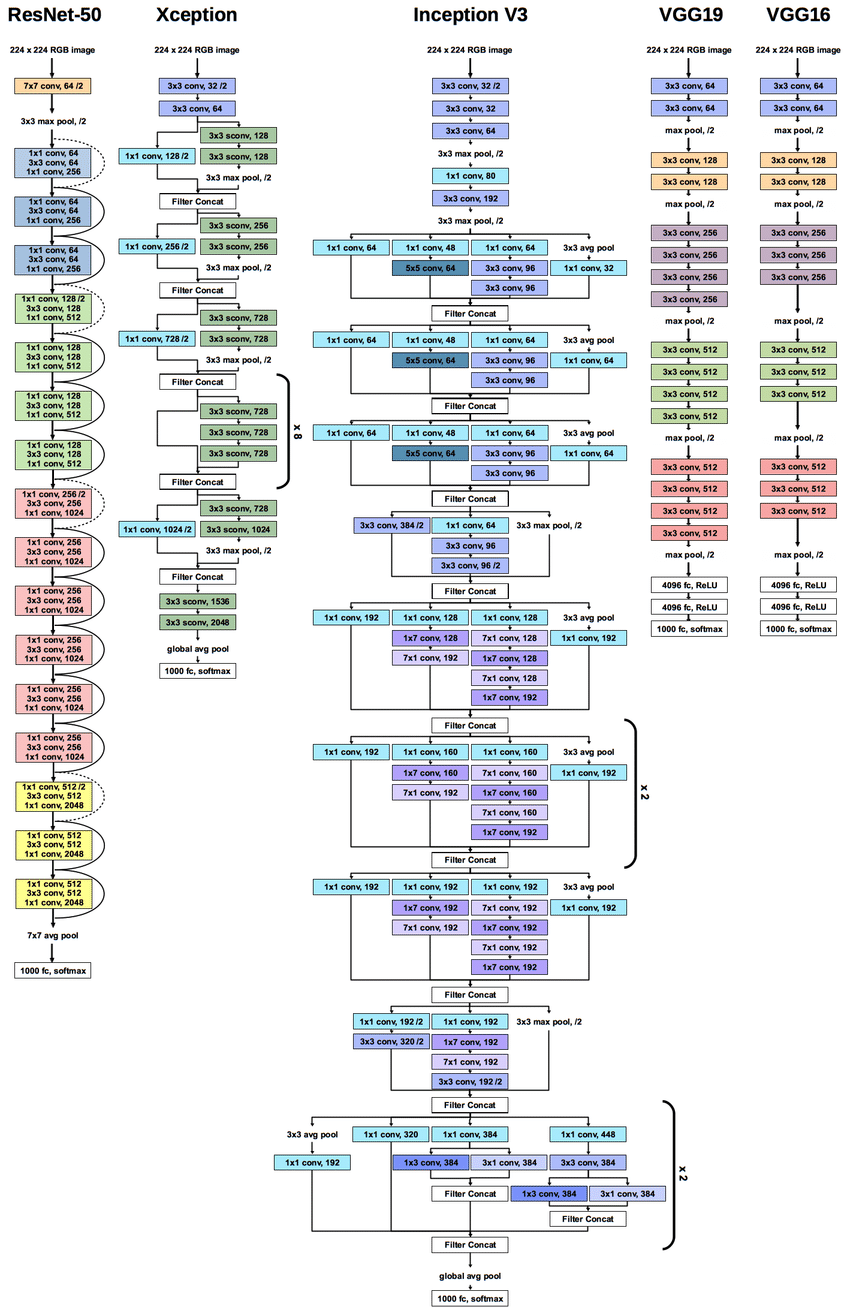

In [6]:
from IPython.display import Image
Image('../input/presentationimages/CNN_Arch/deep learning architecture.png')

# 2) VGGNet16
* Research Paper:  https://arxiv.org/abs/1409.1556
* Developed by  : Karen Simonyan, Andrew Zisserman

* When AlexNet was published, it easily won the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) and proved itself to be one of the most capable models for object-detection out there. Its key features include using ReLU instead of the tanh function, optimization for multiple GPUs, and overlapping pooling. It addressed overfitting by using data augmentation and dropout.
* While previous derivatives of AlexNet focused on smaller window sizes and strides in the first convolutional layer, VGG addresses another very important aspect of CNNs: depth. Let’s go over the architecture of VGG:
1. <font color="red">Input </font>: VGG takes in a 224x224 pixel RGB image. For the ImageNet competition, the authors cropped out the center 224x224 patch in each image to keep the input image size consistent.
2. <font color="red"> Convolutional Layers</font>: The convolutional layers in VGG use a very small receptive field (3x3, the smallest possible size that still captures left/right and up/down). There are also 1x1 convolution filters which act as a linear transformation of the input, which is followed by a ReLU unit. The convolution stride is fixed to 1 pixel so that the spatial resolution is preserved after convolution.
3. <font color="red"> Fully-Connected Layers</font>: VGG has three fully-connected layers: the first two have 4096 channels each and the third has 1000 channels, 1 for each class.
4. <font color="red"> Hidden Layers</font>: All of VGG’s hidden layers use ReLU (a huge innovation from AlexNet that cut down training time). Also,VGGNet does not generally use Local Response Normalization (LRN), as LRN increases memory consumption and training time with no particular increase in accuracy.
* Learn more @ https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c

**VGG16 Implementation using Tensorflow --> Python**

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (224, 224, 3),include_top = False,weights = 'imagenet')
# we don’t have to train all the layers, we make them non_trainable
for layer in base_model.layers:
    layer.trainable = False
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5 or any acceptable values as per your need/complexity
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(1,activation='sigmoid')(x) # Use Softmax if class more than 2 classes
model = tensorflow.keras.models.Model(base_model.input,x)

58892288/58889256 [==============================] - 0s 0us/step


# 3) ResNet50 Model

* Research Paper: https://arxiv.org/pdf/1512.03385.pdf
* Developed by  : <font color="Blue">Microsoft Research </font>[Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun]

* It is based on the concept of 'Residual Learning'. Residual Learning is based on using residual blocks and stacking them   gives neural networks to perform better.
* Resnet is short name for Residual Network that supports Residual Learning. The 50 indicates the number of layers that it   has. So Resnet50 stands for Residual Network with 50 layers.
* Simpler Neural netoworks do not perform well on training data due to inability to extract important features from images.    
  Thus, one will automatically increase the number of layers to increase performance metrics like accuracy and AUROC. But as we   go deeper with the neural networks by adding more layers, the accuracy starts saturating and then also degrades. Residual  
  training tries to solve this problem.
*  In residual learning, instead of trying to learn some features, try to learn some residual. Residual can be simply understood as subtraction of feature learned from input of that layer. ResNet does this using shortcut connections (directly connecting input of nth layer to some (n+x)th layer. It has proved that training this form of networks is easier than training simple deep convolutional neural networks and also the problem of degrading accuracy is resolved.
* With residual blocks, inputs can forward propagate faster through the residual connections across layers and more specially it does use Batch Normalization layers to speed up runtime and reduce overfitting
* ResNets also tries to solve the Vanishing Gradients problem. It avoids the gradients to decrease exponentially quickly to zero. In ResNet, a "Short-cut" or a Skip Connection allows a gradient to be directly back-propagate to earlier layers.
* For deeper tutorials, click here: https://cv-tricks.com/keras/understand-implement-resnets/. Probably one of the best tutorials. 

Initialize a base model with imagenet weights and required input size of images

In [8]:
base_model = tensorflow.keras.applications.ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3),classes=6)

94773248/94765736 [==============================] - 1s 0us/step


define Tail model to tune the output to our requirements

In [9]:
tailModel = base_model.output
tailModel = AveragePooling2D(pool_size=(7, 7))(tailModel)
tailModel = Flatten(name="flatten")(tailModel)
tailModel = Dense(256, activation="relu")(tailModel)
tailModel = Dropout(0.2)(tailModel)
tailModel = Dense(1, activation="softmax")(tailModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
resmodel = Model(inputs=base_model.input, outputs=tailModel)
# loop over all layers in the base model and freeze them so they will
# layers not freezed will be updated during the training process
for layer in base_model.layers:
    layer.trainable = False

# 4) MobileNet

* Research Paper: https://arxiv.org/pdf/1704.04861.pdf
* Developed by  : Google Inc.

* MobileNets are a family of mobile-first computer vision models for TensorFlow, designed to effectively maximize accuracy while being mindful of the restricted resources for an on-device or embedded application.
* Also, play a very handly role when there is limited hardware setup like smaller GPUs and CPUs for training your Neural networks on larger datasets.
* MobileNets are small, low-latency, low-power models parameterized to meet the resource constraints of a variety of use cases.   They can be built upon for classification, detection, embeddings and segmentation tasks.
* MobileNets uses 'Depthwise Separable Convolutions'. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in a light weight Deep Neural Networks.
* Explore more @ https://cutt.ly/tjhmbKl

In [10]:
mobile = tensorflow.keras.applications.mobilenet.MobileNet()
x = mobile.layers[-6].output
x = Dropout(0.20)(x)
predictions = Dense(1, activation='sigmoid')(x)
# Combining pre-trained MobileNet model with pedictions layer to help it to connect input and output layers for out purpose
mob_model = Model(inputs=mobile.input, outputs=predictions)

17227776/17225924 [==============================] - 0s 0us/step


In [11]:
# Number of layers in pre-trained model and tuned model
print('Number of layers in MobileNet_v1 is ' + str(len(mobile.layers)))
# We have removed 5 layers from the original imagenet model and appended 2 layers on top of it. LET's check if it is 92 - 5 + 2 = 89
print('Number of layers in Tuned MobileNet model is '+ str(len(mob_model.layers)))

Number of layers in MobileNet_v1 is 92
Number of layers in Tuned MobileNet model is 89


# 5) Inception or GoogleNet

* Research Paper: https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf
* Developed by  : Google Inc., University of North Carolina, Chapel Hill, University of Michigan, Ann Arbor and Magic Leap Inc.

* Inception Neural network was once considered a state-of-the-art deep learning architecture for solving image recognition and detection problems.
* Inception Modules are used in Convolutional Neural Networks to allow for more efficient computation and deeper Networks through a dimensionality reduction with stacked 1×1 convolutions. The modules were designed to solve the problem of computational expense, as well as overfitting, among other issues. The solution, in short, is to take multiple kernel filter sizes within the CNN, and rather than stacking them sequentially, ordering them to operate on the same level. 
* Inception Modules are incorporated into convolutional neural networks (CNNs) as a way of reducing computational expense. As a neural net deals with a vast array of images, with wide variation in the featured image content, also known as the salient parts, they need to be designed appropriately. 
* The most simplified version of an inception module works by performing a convolution on an input with not one, but three different sizes of filters (1x1, 3x3, 5x5). Also, max pooling is performed. Then, the resulting outputs are concatenated and sent to the next layer. By structuring the CNN to perform its convolutions on the same level, the network gets progressively wider, not deeper. 
* To make the process even less computationally expensive, the neural network can be designed to add an extra 1x1 convolution before the 3x3 ad 5x5 layers. By doing so, the number of input channels is limited and 1x1 convolutions are far cheaper than 5x5 convolutions. It is important to note, however, that the 1x1 convolution is added after the max-pooling layer, rather than before. 
* The design of this initial Inception Module is known commonly as GoogLeNet, or Inception v1. Additional variations to the inception module have been designed, reducing issues such as the vanishing gradient problem and overfitting.
* To go Deeper refer: https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)
inception_model = tensorflow.keras.models.Model(base_model.input, x)

# 6) EfficientNet

* Research Paper: https://arxiv.org/pdf/1905.11946.pdf
* Developed by: Google [ Mingxing Tan, and Quoc V. Le ]

* Google published both a very exciting paper and source code for a newly designed Convolutional neural network called EfficientNet, that set new records for both accuracy and computational efficiency.
* Currently there are various version of EfficientNets from EfficientNetB0 to B7 ,differing on size of input images that are to be given to the model for training.
* The invention of EfficientNet was not a minor improvement but rather an accuracy improvement of up to 6% while on the order of 5 – 10x more efficient than most current CNN’s architectures. Their underlying findings should serve as solid guides for those looking to architect better CNN’s in the future developments.
* EfficientNet currently tops the 'State of the Art' CNN algorithms both in accuracy and in computational performance efficiency.
* It is mainly developed by learning the mistakes of previous architctures and its shortcommings.
* It uses a scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient.
* The huge reduction in parameters and computations required with EfficientNet may open up new opportunities for CNN’s to be used on mobile platforms and represent a big leap forward for Mobile native developments in AI.
* Learn more @ https://lessw.medium.com/efficientnet-from-google-optimally-scaling-cnn-model-architectures-with-compound-scaling-e094d84d19d4

<h3> Performance of Various Transfer Learning Algorithms vs EfficientNets Versions </h3>

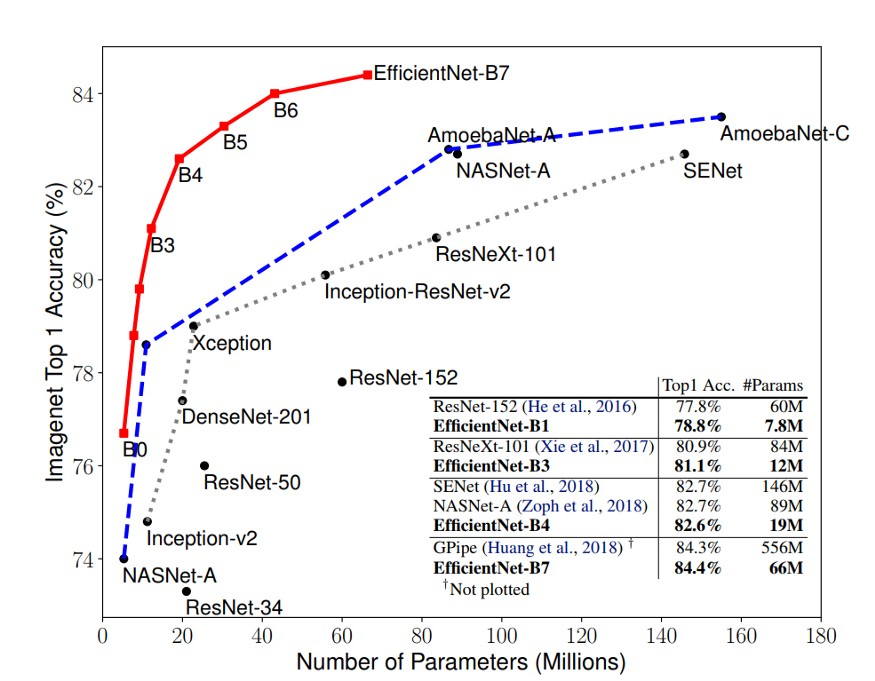

In [14]:
from IPython.display import Image
Image('../input/presentationimages/CNN_Arch/efficientnetvsall.jpeg')

In [15]:
# Install EfficientNet libraries with tensorflow-keras support
!pip install -U efficientnet

     |████████████████████████████████| 50 kB 772 kB/s 


In [16]:
import efficientnet.keras as efn

In [17]:
# Initialize the model
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet') 
for layer in base_model.layers:
    layer.trainable = False

16809984/16804768 [==============================] - 1s 0us/step


In [18]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(base_model.input,predictions)

There are many other models like Xception, NASNet and combination of existing transfer learning models, increasing performance with decrease in parameters and training time. One of them is NASNet, whose implementation is shown below:-

# 7) NASNet

In [19]:
from tensorflow.keras.applications.nasnet import NASNetMobile, preprocess_input, decode_predictions
model_imagenet = NASNetMobile(weights='imagenet', include_top=True)

24231936/24227760 [==============================] - 0s 0us/step


In [20]:
logits_layer = model_imagenet.get_layer('predictions')
model_logits = tensorflow.keras.Model(inputs=model_imagenet.input,outputs=logits_layer.output)

# Model Checkpoints to track optimal weights and performance

In [21]:
file_location = "model.h5"
# A feature of CallBack API that keeps track of performance of the model and stores the best performaces at different time steps.
checkpoint = ModelCheckpoint(file_location,monitor='val_accuracy',verbose=1,save_best_only=True, mode='max')
# Used for reducing learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,mode='max',min_lr=0.00001)
# List of callbacks used from CallBack APIs                                                        
callbacks_list = [checkpoint, reduce_lr]

# Optimizer | Loss Function | Metric 

In [22]:
# Setup Optimizer Algorithm --> Adam (Adaptive Moment Estimation)
opt_algo = tensorflow.keras.optimizers.Adam()
loss_type = tensorflow.keras.losses.BinaryCrossentropy()
#model.compile(optimizer=opt_algo, loss=loss_type,metrics=['accuracy'])

# Compilation Phase

In [23]:
mob_model.compile(optimizer=opt_algo, loss=loss_type,metrics=['accuracy'])

# Training Phase

# Fittting our MobileNet model on Skin Lesion Dataset
* MobileNetv1 Implemenatation for Classifying Malignant and Benign skin lesions
* With No Feature Engineering or Image Processing done, we still could get 88% Training Accuracy and 86% Validation Accuracy in just 5 Epochs



In [24]:
start = time.time()
history = mob_model.fit(train_generator,epochs=5,validation_data=validation_generator,verbose=1,callbacks=callbacks_list)
end = time.time()
print(f'The time taken to execute is {round(end-start,2)} seconds.')

Epoch 1/5
165/165 [==============================] - 61s 339ms/step - loss: 0.5777 - accuracy: 0.7847 - val_loss: 1.3374 - val_accuracy: 0.6515

Epoch 00001: val_accuracy improved from -inf to 0.65152, saving model to model.h5
Epoch 2/5
165/165 [==============================] - 38s 229ms/step - loss: 0.3555 - accuracy: 0.8365 - val_loss: 0.5131 - val_accuracy: 0.8152

Epoch 00002: val_accuracy improved from 0.65152 to 0.81515, saving model to model.h5
Epoch 3/5
165/165 [==============================] - 37s 226ms/step - loss: 0.2928 - accuracy: 0.8593 - val_loss: 0.3273 - val_accuracy: 0.8606

Epoch 00003: val_accuracy improved from 0.81515 to 0.86061, saving model to model.h5
Epoch 4/5
165/165 [==============================] - 37s 227ms/step - loss: 0.2944 - accuracy: 0.8781 - val_loss: 0.3212 - val_accuracy: 0.8803

Epoch 00004: val_accuracy improved from 0.86061 to 0.88030, saving model to model.h5
Epoch 5/5
165/165 [==============================] - 37s 227ms/step - loss: 0.2396 

In [25]:
val_loss,val_acc = mob_model.evaluate(validation_generator) #Picking our best model

83/83 [==============================] - 2s 23ms/step - loss: 0.4158 - accuracy: 0.8561


With Additional Hyper-parameter tuning and Image processing, one can develop a highly competant Deep Learning Diagnostic Model that generalizes better !!

Hope all liked and and understood this kernel on CNN Architectures !! If any mistakes do comment it below !!

# UPVOTE the Notebook, if you Liked it !!